## Google Colab Usage



**Confirm login account**
* Please make sure to be logged in with the Google account you want to use for the exercises before running the code cells below. You can check by clicking the circular account icon in the top right corner of the colab notebook.

**Working directory**
* Note: The software and data will be installed in a directory called "SSW2023/pRT" in your Google drive. This directory will be created if it does not exist.

**Running cells**
* Run cells individually by clicking on the triangle on each cell

**To Restart runtime**
*   Click on Runtime menu item
*   Select Restart runtime
*   Select Run code cells individually from the top

**To Recreate runtime**
*   Click on Runtime menu item
*   Select Disconnect and Delete runtime
*   Select Run code cells individually from the top

**To Exit:**
*   Close the browser window

# &#128992; When running on Colab: pRT installation and setup

This cell installs everything you need in Colab, as explained in the hands-on session's documentation.

&#128992; **Run this cell if you are running on Colab**

In [ ]:
import os

# Install MultiNest
os.chdir('/content/')
!rm -rf multinest
!git clone https://www.github.com/johannesbuchner/multinest.git
!cd multinest/build && cmake ..
!sed -i 's/-lmkl_gf_lp64 -lmkl_gnu_thread/-lmkl_mc3 -lmkl_rt -lmkl_avx2/' multinest/build/src/CMakeFiles/multinest_shared.dir/link.txt
!cd multinest/build && make && make install
!cp /content/multinest/lib/* /lib/

# Install petitRADTRANS (pRT)
import numpy as np
!pip install --no-cache-dir -U petitRADTRANS

Cloning into 'multinest'...
remote: Enumerating objects: 549, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 549 (delta 65), reused 49 (delta 19), pack-reused 431
Receiving objects: 100% (549/549), 300.02 KiB | 5.26 MiB/s, done.
Resolving deltas: 100% (342/342), done.
-- The Fortran compiler identification is GNU 11.3.0
-- The C compiler identification is GNU 11.3.0
-- The CXX compiler identification is GNU 11.3.0
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Check for working Fortran compiler: /usr/bin/f95 - skipped
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile featur

&#128992; **Run the  2 cells if you are running on Colab**

This cell mounts the Google Drive (please allow it to do so) and specifies the path of the pRT input data folder. If you *are* running on Colab, but changed the default path specified in the setup notebook, please modify the path to correctly point to the input data in your Google Drive.

"SSW2023/pRT" is the default and you can leave that as-is or change it in the fill in box on the right. Be sure to pick a directory name that does not have any spaces. *This must match the directory used in the setup notebook.* This cell must be run to define the data location.

In [ ]:
# If you update the directory in the box on the right, re-run this cell
pRT_dir = 'SSW2023/pRT' #@param {type:"string"}

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

# Google top level drive dir
drive_dir = "/content/drive/MyDrive/"

# pRT directory path
pRT_path = os.path.join(drive_dir, pRT_dir)

# Confirm directory already exists per Setup
if os.path.exists(pRT_path):
  print("OK! directory '%s' exists" %pRT_path)
else:
  print("Run Setup directory '%s' does not exist" %pRT_path)

# Specify location of pRT's input data
os.environ['pRT_input_data_path'] = \
                  pRT_path+'/pRT_retrieval_SSW/input_data'

Mounted at /content/drive
OK! directory '/content/drive/MyDrive/SSW2023/pRT' exists


Let's switch to the `pRT_retrieval_SSW/retrievals` folder for running the retrieval:  

&#128992; **Run this cell if you are running on Colab**

In [ ]:
os.chdir(pRT_path+'/pRT_retrieval_SSW/retrievals')

# &#128309; When running on your computer:
Please modify `absolute_path_of_the_pRT_retrieval_SSW_folder_on_your_machine` below to point to the `pRT_retrieval_SSW` folder you downloaded as described in the documentation. Then run the cell below to set the `pRT_input_data_path` environment variable accordingly. This is done such that pRT knows where the input data is.

&#128309; **Run this cell if running on your computer (not Colab!)**

In [ ]:
absolute_path_of_the_pRT_retrieval_SSW_folder_on_your_machine = '' # Please complete!

import os
import numpy as np

os.environ['pRT_input_data_path'] = \
    os.path.join(absolute_path_of_the_pRT_retrieval_SSW_folder_on_your_machine,
                 'input_data')

Let's switch to the `pRT_retrieval_SSW/retrievals` folder for running the retrieval.

&#128309; **Run this cell if running on your computer (not Colab!)**

In [ ]:
os.chdir(os.path.join(absolute_path_of_the_pRT_retrieval_SSW_folder_on_your_machine,
                 'retrievals'))

# What is a retrieval?
As you learned in the lecture by Mike Line, in retrievals we try to constrain the properties of an atmosphere, given an observation. For your reference, we will repeat the most important concepts here.

## Classical $\chi^2$-minimization
Many of you may have come across the concept of "fitting an observation" by so-called $\chi^2$-minimization. In short, one the minimizes the following quantity
\begin{equation}
\chi^2 = \sum_{i=1}^{N_\lambda}\frac{(y_i-f_i)^2}{\epsilon_i^2},
\end{equation}
where $y_i$ are the observed data points, $f_i$ is the model prediction of said data points, $\epsilon_i$ is the measurement uncertainty, and $N_{\lambda}$ is the number of data points. If we assume that the measuring uncertainties follow a Gauss distribution and that the measurements are independent, then the probability of observing the data $\mathbf{y}$, given the model prediction $\mathbf{F}(\mathbf{x})$, where $\mathbf{x}$ are the free parameters of the model, would be
\begin{equation}
P(\mathbf{y}|\mathbf{x}) = Ce^{-\chi^2/2}.
\end{equation}
Here $C$ is a normalization constant, ensuring that $\int P(\mathbf{y}|\mathbf{x})d\mathbf{y}=1$, as must be the case for any probability distribution. Note that we expressed the data, model, and model parameters as vectors now (so $\mathbf{y}$, $\mathbf{F}$, and $\mathbf{x}$, respectively; so $\mathbf{F}$ has elements $f_i$). $\chi^2$ is thus related to $P(\mathbf{y}|\mathbf{x})$ as shown above, and by minimizing $\chi^2$ we look for a set of parameter values $\mathbf{x}_{\rm best}$ that maximize $P(\mathbf{y}|\mathbf{x})$.

It is potentially not a bad assumption that $\mathbf{x}_{\rm best}$ is related to the most likely model parameters, given the measurement. But we would like to know the *actual* distribution of $\mathbf{x}$ that are consistent with the data.

## Retrieval definition

Retrievals do just that: they provide us with an estimate of $P(\mathbf{x}|\mathbf{y})$ (instead of maximizing $P(\mathbf{y}|\mathbf{x})$). They thus answer the question: "*what is the probability distribution of model parameter values, given an observation?*" For an atmospheric retrieval we do this by constructing a so-called "forward model" that can generate synthetic (and noise-free) observations as a function of the atmospheric properties, which are expressed through the parameters of the forward model. The forward model is then compared to the data repeatedly with different parameter values, in order to determine the distribution of parameter values, given the data.

Analogous to what we discussed above, we now define the following quantities: $\mathbf{y}$ is the data, in this case a vector of length $N_\lambda$ that contains the observed flux values $y_i$ at $N_\lambda$ wavelength points (so index $i$ runs from 1 to $N_\lambda$). The vector $\epsilon$ (also of length $N_\lambda$) contains the associated uncertainties $\epsilon_i$ for the measured flux values $y_i$. Next we define the vector $\mathbf{x}$ which has the length $N_{\rm param}$. This vector encodes the properties of the atmosphere for our forward model; $N_{\rm param}$ is therefore the number of parameters. For example, $x_1$ may be the temperature at the top of the atmosphere, $x_2$ may be the temperature at the bottom, $x_3$ may be the abundance of the important absorber H$_2$O, etc. Finally, the forward-model $\mathbf{F}(\mathbf{x})$ is a function that takes in the vector $\mathbf{x}$ and predicts a synthetic (noise-free) observation by solving the radiative transfer equation, modeling the observational process, etc. That means that the output of $\mathbf{F}(\mathbf{x})$ is also a vector of length $N_{\rm \lambda}$, like the observation $\mathbf{y}$.

As stated above, with a retrieval we want to solve for $P(\mathbf{x}|\mathbf{y})$, so the probability distribution of forward model parameters, given the observation. This desired distribution is called "posterior distribution" (or just "posterior"). Using [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem), we can express the posterior like this
$$
P(\mathbf{x}|\mathbf{y}) = \frac{1}{P(\mathbf{y})}\underbrace{P(\mathbf{x})}_{\rm "Prior"} \underbrace{P(\mathbf{y}|\mathbf{x})}_{\rm "Likelihood"}.
$$
Here, $P(\mathbf{y})$ can again be regarded as a constant, ensuring that $\int P(\mathbf{x}|\mathbf{y}) d\mathbf{x}=1$. The two other terms are the prior and the likelihood, described in the following paragraphs.

### Priors

The "prior" $P(\mathbf{x})$ is an important quantity and in fact a key difference between a retrieval and a classical fit via $\chi^2$ minimization. The prior encodes any *prior* knowledge that we had about the atmosphere *before* making the observation. An obvious example for a prior would be $P(T<0) = 0$, that is, temperatures cannot be negative. We may also have an independent measurement of the planet's mass and radius, giving rise to a prior on the planet's atmospheric gravity. If we lack any prior information for a given parameter, we will use a broad, "uninformative" prior distribution (usually uniform or log-uniform).

## Log-likelihood

The likelihood brings our old accquaintance  $\chi^2$ back. It answers the question: "How likely is it that we observed the data $\mathbf{y}$, assuming that $\mathbf{x}$ correctly describes the state of the atmosphere?" Assuming that the data points have independent uncertainties that follow a Gauss (normal) distribution we can write
$$
P(\mathbf{y}|\mathbf{x}) = \prod_{i=1}^{N_\lambda}\frac{1}{\sqrt{2\pi\epsilon_i^2}}{\rm exp}\left[-\frac{(y_i-f_i)^2}{2\epsilon_i^2}\right],
$$
where $f_i$ is the $i$-th element of $\mathbf{F}(\mathbf{x})$. Here we fully wrote out the expression $P(\mathbf{y}|\mathbf{x}) = Ce^{-\chi^2/2}$ that we saw above.

Since during the retrieval it can happen that we compare very small to very large likelihood values (which is challenging numerically) it is customary to work in log-space. In this case the likelihood (usually denoted by $L$) becomes the so-called "log-likelihood" ${\rm log}(L)$:
$$
{\rm log}(L) = -\frac{1}{2}\sum_{i=1}^{N_\lambda}\frac{(y_i-f_i)^2}{\epsilon_i^2} + C,
$$
where $C=-0.5\sum_{i=1}^{N_{\lambda}}{\rm log}(2\pi \epsilon_i^2)$ is a constant in case that the uncertainties are fixed. This is usually the case, but note that sometimes the magnitude of the uncertainties is also a free parameter of the retrieval. The log-likelihhod therefore simply is
$$
{\rm log}(L) = -\frac{\chi^2}{2}+C.
$$

## Retrieval practicalities
The goal of a retrieval is to determine the posterior $P(\mathbf{x}|\mathbf{y})$. The problem is that we usually cannot simply analytically (or even numerically) calculate this function. Instead, retrieval methods make use of the fact that we can straightforwardly calculate prior and likelihood values once a forward model has been defined and a set of parameter values has been selected. Commonly used retrieval setups then employ the so-called "nested sampling" method. All it does is to generate samples of $P(\mathbf{x}|\mathbf{y})$. So while we do not know the exact functional form of $P(\mathbf{x}|\mathbf{y})$, we know how to sample from it. For this the forward model has to be called many (thousands to hundreds of millions of) times and compared to the data. Sample suggestions which are more probable, given the prior, and more consistent with the data, given the likelihood, are more likely to be accepted. This process is also called "inverting the forward model", and can be very computationally expensive.

# Retrieval setup
We begin by loading the packages we will need below:

In [ ]:
from matplotlib import pyplot as plt

from petitRADTRANS import Radtrans
from petitRADTRANS import nat_cst as nc
from petitRADTRANS.retrieval import rebin_give_width as rgw
from petitRADTRANS.retrieval.util import calc_MMW
from petitRADTRANS.retrieval import parameter as pm
from petitRADTRANS.retrieval import Retrieval,RetrievalConfig

## Preparing the data
In what follows, we will use the blue and the red part of the NIRSPec G395H spectrum of the hot Jupiter WASP-39b ([Alderson et al. 2023](https://www.nature.com/articles/s41586-022-05591-3)), as published on [Zenodo](https://zenodo.org/record/7185300#.ZGE9GHZByxq). WASP-39b is famous for being the first planet in which photchemically produced SO$_2$ was detected with JWST. We will try the same with the G395H data here. In order to have retrievals run quickly enough, we will run at a low spectral resolution, however. So we will bin down the two spectra (weighted_average_WASP_39b_transmission_1.dat and weighted_average_WASP_39b_transmission_2.dat). In principle you could also use the G395H transmission spectrum of WASP-39b that you derived in hands-on session 2. Here we will use the Zenodo version to minimize the risk of formatting errors (we do not have much time!). Maybe you want to try your own reduction later / "offline"? First we load the two files here at intrinsic resolution from the hands-on session input data folder, to get a first impression of the data. The putative SO$_2$ feature appears at ~4-4.2 µm.

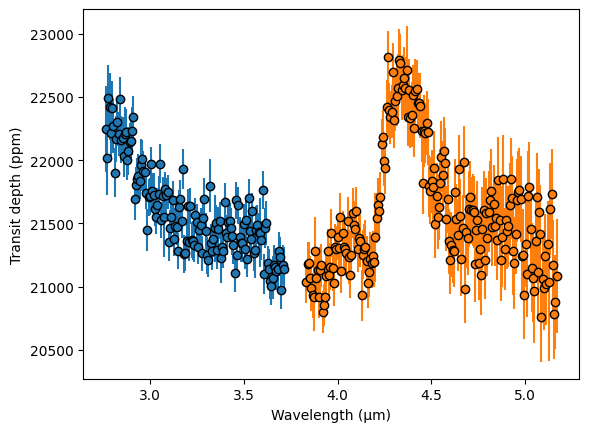

In [ ]:
input_data_blue = np.genfromtxt('../observations/'
                             'weighted_average_WASP_39b_transmission_1.dat')

plt.errorbar(input_data_blue[:,0],
             input_data_blue[:,1]*1e6, # multiply by 10^6 to convert to depth in units of ppm, for the plot.
             yerr = input_data_blue[:,2]*1e6,  # multiply by 10^6 to convert to depth in units of ppm, for the plot.
             marker='o', linestyle='',markeredgecolor='k')

input_data_red = np.genfromtxt('../observations/'
                             'weighted_average_WASP_39b_transmission_2.dat')
plt.errorbar(input_data_red[:,0],
             input_data_red[:,1]*1e6, # multiply by 10^6 to convert to depth in units of ppm, for the plot.
             yerr = input_data_red[:,2]*1e6, # multiply by 10^6 to convert to depth in units of ppm, for the plot.
             marker='o', linestyle='',markeredgecolor='k')

plt.xlabel('Wavelength (µm)')
plt.ylabel('Transit depth (ppm)')

plt.show()